In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

import warnings 
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('avacado.csv')
data.head()

,Sno,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
data.nunique()

Sno               52
Date             104
AveragePrice     113
Total Volume    1517
4046            1517
4225            1517
4770            1516
Total Bags      1517
Small Bags      1517
Large Bags      1377
XLarge Bags      711
type               1
year               2
region            51
dtype: int64

In [5]:
data.dtypes

Sno               int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [6]:
data.drop(['Date','Sno'],axis=1,inplace=True)

In [7]:
data.shape

(1517, 12)

In [8]:
data.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['year']=le.fit_transform(data['year'])
data['type']=le.fit_transform(data['type'])


In [10]:
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.0,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,0.0,0.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.0,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,0.0,0.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,0.0,0.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,0.0,0.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,0.0,0.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,0.0,1.000000


In [11]:
data.columns


Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

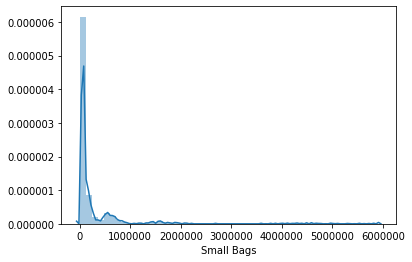

In [12]:
sns.distplot(data['Small Bags']);

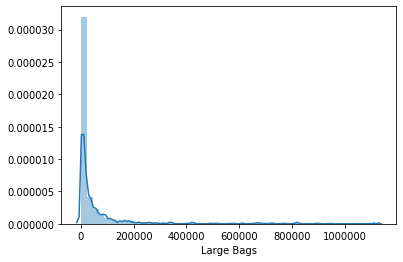

In [13]:
sns.distplot(data['Large Bags']);

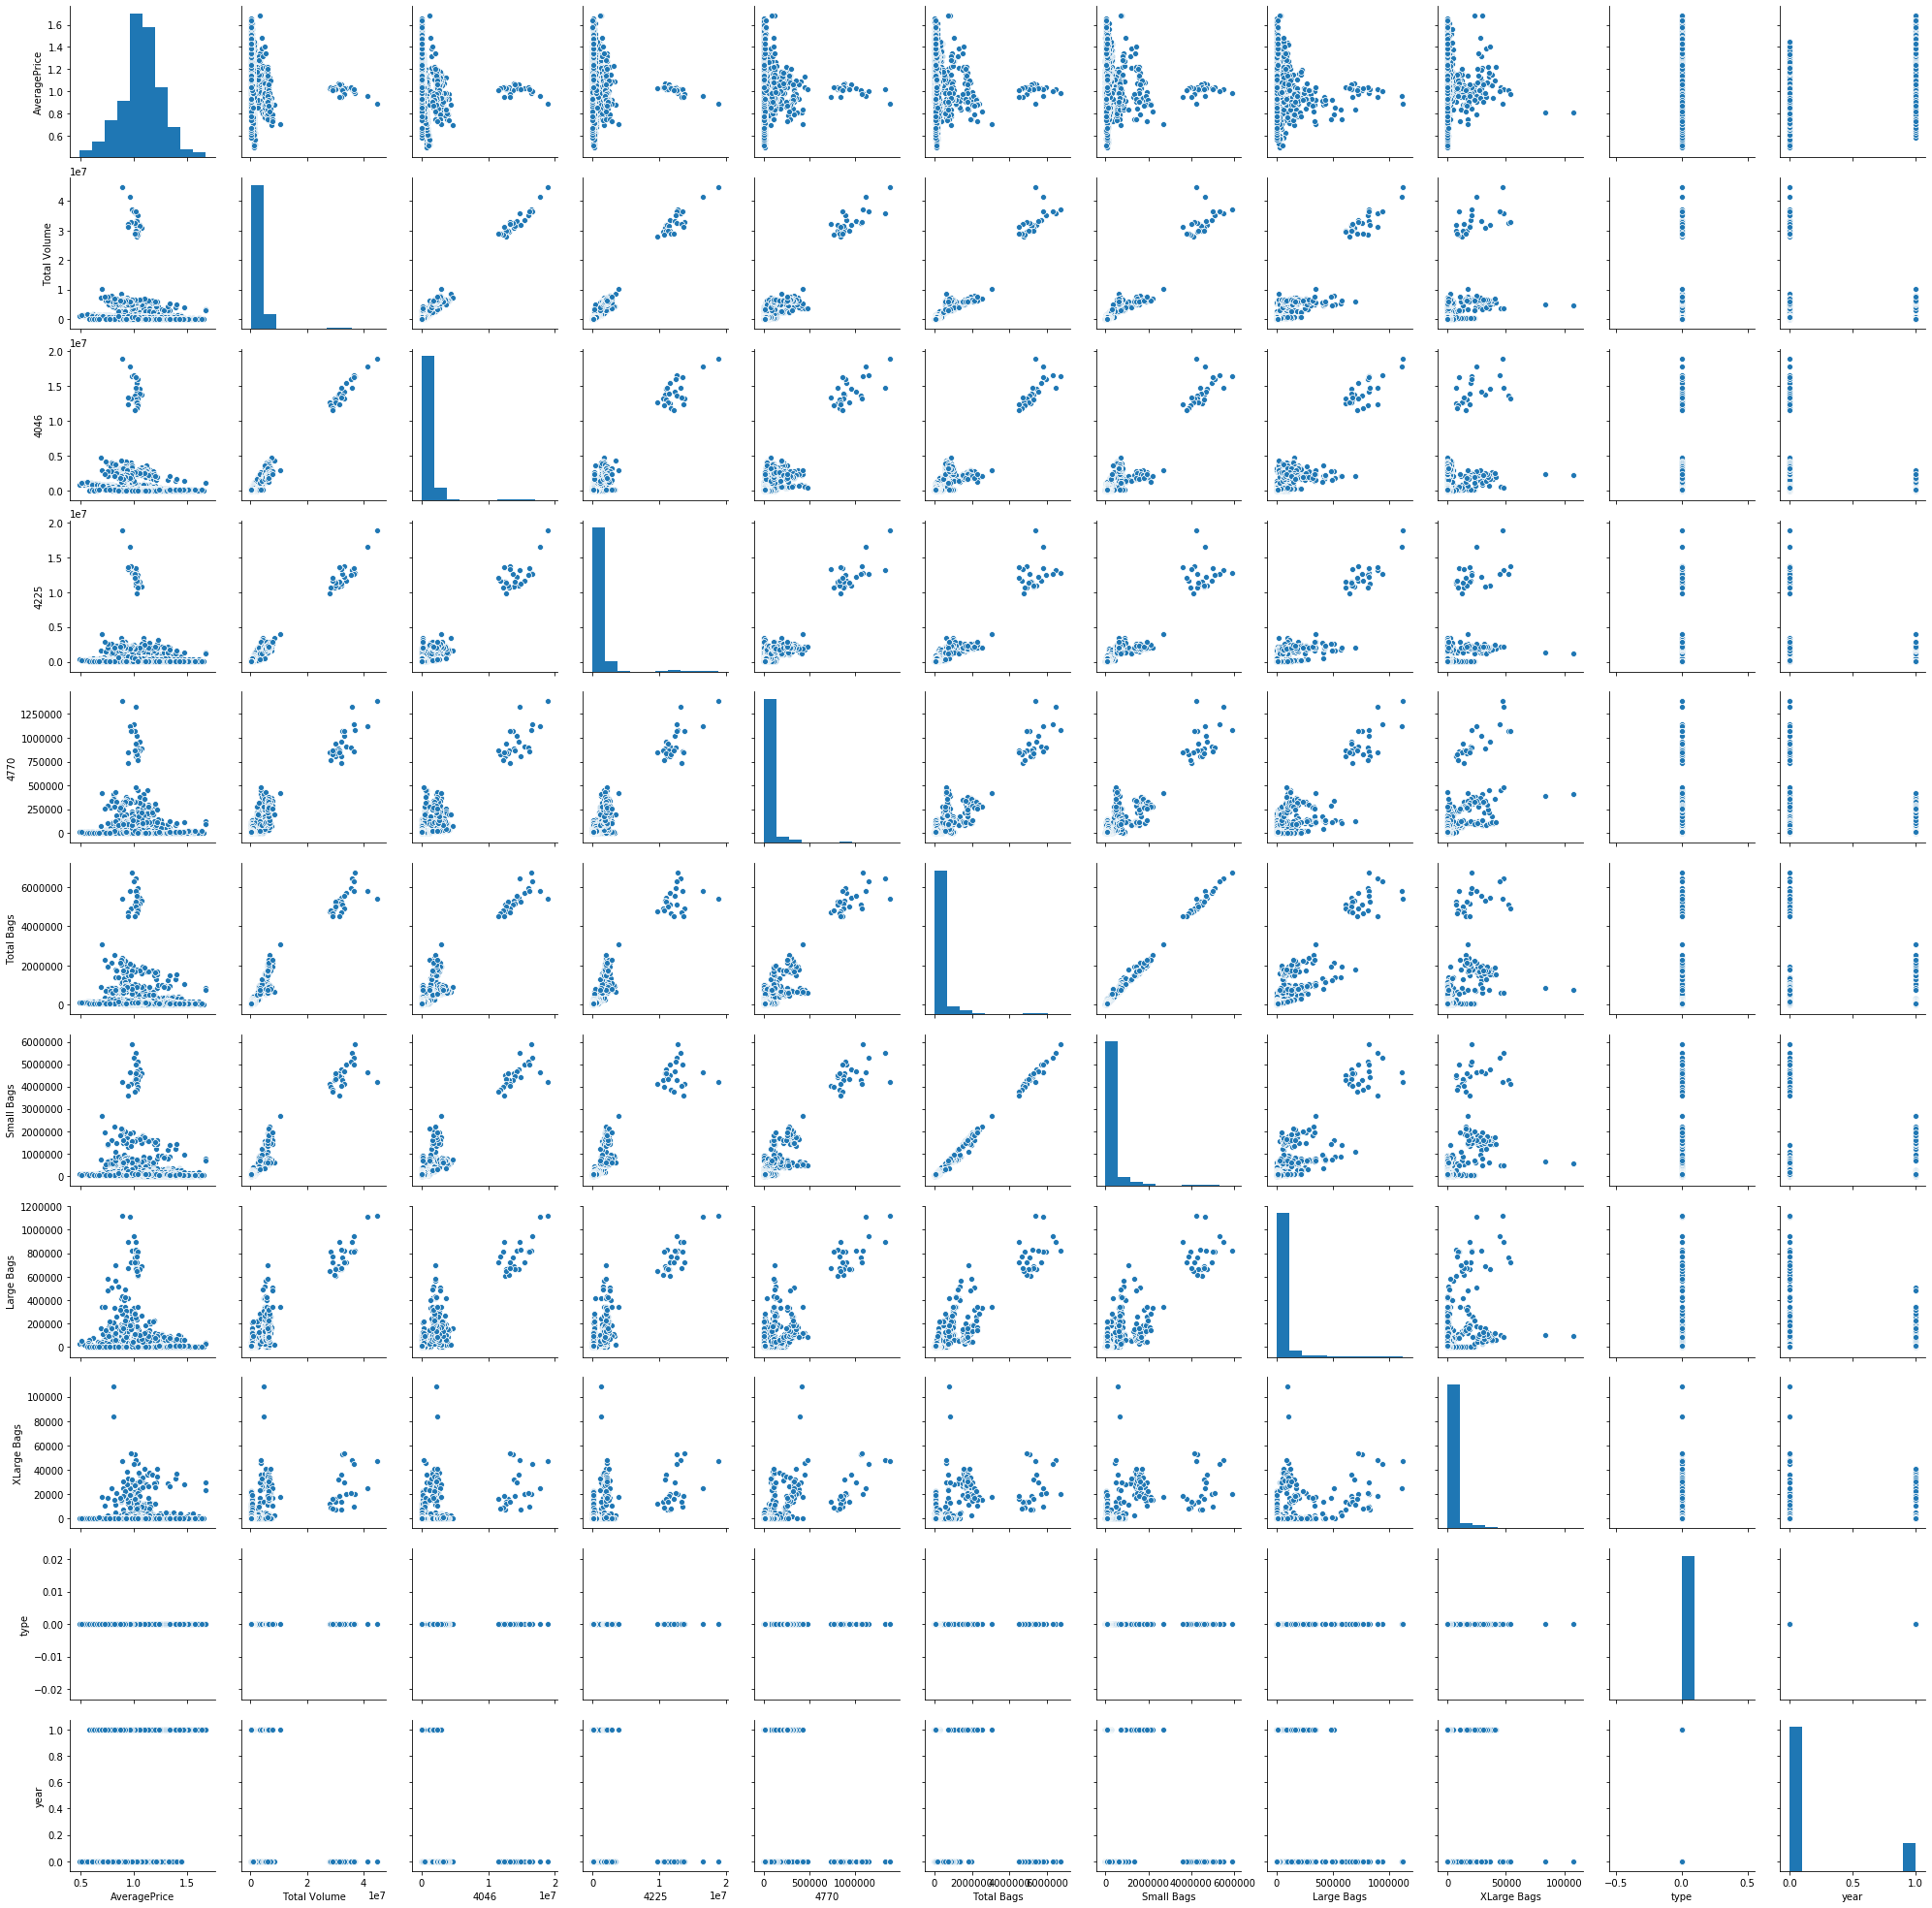

In [14]:
sns.pairplot(data);

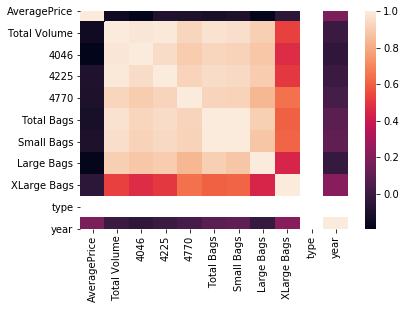

In [15]:
sns.heatmap(data.corr());

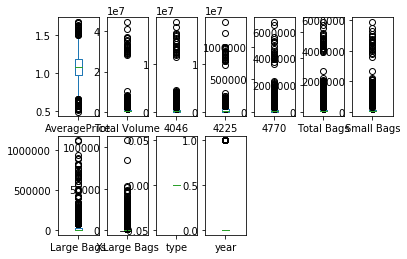

In [16]:
data.plot(kind='box',subplots=True,layout=(2,7));

In [17]:
df_x=data.drop('region',axis=1)
y=data['region']
df_x.shape,y.shape

((1517, 11), (1517,))

In [18]:
df_x.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
type            0.000000
year            1.828332
dtype: float64

In [19]:
for col in df_x.columns:
    if df_x.skew().loc[col]>0.55:
        df_x[col]=np.cbrt(df_x[col])

In [20]:
df_x.skew()

AveragePrice   -0.109444
Total Volume    2.124006
4046            1.767021
4225            1.775945
4770            1.526943
Total Bags      2.149088
Small Bags      2.143413
Large Bags      1.431704
XLarge Bags     2.000670
type            0.000000
year            1.828332
dtype: float64

In [21]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,1.350481,-0.928906,-1.043532,-0.617305,-1.068547,-1.044856,-0.990876,-0.918529,-0.618951,0.0,-0.441008
1,1.456397,-0.969397,-1.074352,-0.680348,-1.055945,-1.022948,-0.967836,-0.914916,-0.618951,0.0,-0.441008
2,-0.767838,-0.750381,-1.063098,-0.360798,-0.993230,-1.060589,-1.007819,-0.910262,-0.618951,0.0,-0.441008
3,0.026531,-0.872407,-1.036671,-0.521476,-1.040551,-1.136444,-1.089446,-0.887616,-0.618951,0.0,-0.441008
4,1.085691,-0.987334,-1.050826,-0.685882,-1.037377,-1.123110,-1.077631,-0.849671,-0.618951,0.0,-0.441008
...,...,...,...,...,...,...,...,...,...,...,...
1512,1.668229,-0.582432,-0.394262,-0.605929,0.104788,-0.391191,-0.393873,0.002333,0.147772,0.0,2.267532
1513,2.303724,-0.608076,-0.473623,-0.631134,0.152102,-0.361726,-0.341373,-0.067597,-0.618951,0.0,2.267532
1514,2.144850,-0.607712,-0.455326,-0.626796,0.083848,-0.368334,-0.353268,-0.082129,0.537739,0.0,2.267532
1515,2.091892,-0.585851,-0.412049,-0.622517,0.103844,-0.357051,-0.333256,-0.081255,-0.618951,0.0,2.267532


In [22]:
x.skew()

AveragePrice   -0.109444
Total Volume    2.124006
4046            1.767021
4225            1.775945
4770            1.526943
Total Bags      2.149088
Small Bags      2.143413
Large Bags      1.431704
XLarge Bags     2.000670
type            0.000000
year            1.828332
dtype: float64

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [24]:
lr=LogisticRegression()
svc=SVC()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
gb=GradientBoostingClassifier()
xgb=XGBClassifier()
ad=AdaBoostClassifier()

In [25]:
model_list=[]
model_list.append(('LogisticRegression',lr))
model_list.append(('SVC',svc))
model_list.append(('Kneighbors',knn))
model_list.append(('DecisionTreeClassifier',dt))
model_list.append(('RandomForestClassifier',rf))
model_list.append(('GradientBoostingClassifier',gb))
model_list.append(('XGBoostClassifier',xgb))
model_list.append(('AdBoostingClassifier',ad))

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=78,test_size=.20)

In [27]:
Model=[]
accuracy=[]
CS=[]
for name,model in model_list:
    print('**********************',name,'************************')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    AS=accuracy_score(pred,y_test)
    print('accuracy is ',AS)
    accuracy.append(AS*100)
    print('\n')
    cs=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('cross_val is ',cs)
    CS.append(cs*100)
    print('\n')
    print('classification report',classification_report(y_test,pred))
    print('\n')
    print('confusion matrix\n',confusion_matrix(y_test,pred))
    print('\n')
    

********************** LogisticRegression ************************
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


accuracy is  0.7236842105263158


cross_val is  0.74139618384039


classification report                      precision    recall  f1-score   support

             Albany       0.50      1.00      0.67        12
            Atlanta       0.60      1.00      0.75         9
BaltimoreWashington       0.92      0.92      0.92        13
              Boise       0.75      0.92      0.83        13
             Boston       0.88      0.50      0.64        14
   BuffaloRochester       0.62      1.00      0.77         5
         California       0.93      1.00      0.97        14
          Charlotte       0.

In [29]:
best_model=pd.DataFrame({'Model': Model,'Accuracy':accuracy,'CV_Score':CS})
best_model

,Model,Accuracy,CV_Score
0,LogisticRegression,72.368421,74.139618
1,SVC,78.947368,82.598460
2,Kneighbors,93.750000,92.171192
3,DecisionTreeClassifier,88.486842,85.067546
4,RandomForestClassifier,94.407895,93.544562
5,GradientBoostingClassifier,88.486842,87.784884
6,XGBoostClassifier,91.776316,90.981718
7,AdBoostingClassifier,13.157895,8.122161


In [31]:
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
gd=GridSearchCV(knn,param_grid=[{'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}],cv=5)
gd.fit(x_train,y_train)
print(gd.best_score_)
print(gd.best_params_)
                      

0.9579554822753503
{'n_neighbors': 1}


In [ ]:
from sklearn.model_selection import GridSearchCV
gb=GradientBoostingClassifier()
gd=GridSearchCV(gb,param_grid=[{
                                 'max_depth':[i for i in range(1,10,1)]}],cv=5)
gd.fit(x_train,y_train)
print(gd.best_score_)
print(gd.best_params_)
                      

In [30]:
from sklearn.externals import joblib
joblib.dump(knn,'Avacado_joblib')

['Avacado_joblib']